In [32]:
print ('San Francisco Airport: Ratings for Services (2010-2017)')
print ('Selection: Questions, All Years')
print ('Data: SFO annual customer surveys')
print ('Rating: 1 (unacceptable) - 5 (outstanding)')

San Francisco Airport: Ratings for Services (2010-2017)
Selection: Questions, All Years
Data: SFO annual customer surveys
Rating: 1 (unacceptable) - 5 (outstanding)


In [33]:
import json
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [34]:
questions_data_dicts={"ALL": {"2010": {"4": 0.564, "3": 0.228, "5": 0.19, "2": 0.016, "1": 0.002}, "2011": {"4": 0.532, "3": 0.225, "5": 0.222, "2": 0.017, "1": 0.004}, "2012": {"4": 0.555, "3": 0.188, "5": 0.237, "2": 0.018, "1": 0.002}, "2013": {"4": 0.578, "3": 0.19, "5": 0.208, "2": 0.022, "1": 0.002}, "2014": {"4": 0.563, "3": 0.195, "5": 0.226, "2": 0.014, "1": 0.002}, "2015": {"4": 0.537, "3": 0.187, "5": 0.263, "2": 0.01, "1": 0.002}, "2016": {"4": 0.559, "3": 0.17, "5": 0.25, "2": 0.017, "1": 0.002}, "2017": {"4": 0.561, "3": 0.165, "5": 0.26, "2": 0.012, "1": 0.002}}, "SIGN": {"2010": {"4": 0.435, "5": 0.281, "3": 0.227, "2": 0.045, "1": 0.013}, "2011": {"4": 0.446, "5": 0.29, "3": 0.212, "2": 0.045, "1": 0.007}, "2012": {"4": 0.449, "5": 0.328, "3": 0.183, "2": 0.032, "1": 0.008}, "2013": {"4": 0.455, "5": 0.291, "3": 0.202, "2": 0.04, "1": 0.011}, "2014": {"4": 0.434, "5": 0.316, "3": 0.205, "2": 0.036, "1": 0.01}, "2015": {"4": 0.441, "5": 0.332, "3": 0.191, "2": 0.029, "1": 0.007}, "2016": {"4": 0.438, "5": 0.338, "3": 0.183, "2": 0.034, "1": 0.006}, "2017": {"4": 0.444, "5": 0.344, "3": 0.177, "2": 0.029, "1": 0.007}}, "WIFI": {"2013": {"4": 0.343, "5": 0.285, "3": 0.198, "2": 0.091, "1": 0.084}, "2014": {"4": 0.327, "5": 0.376, "3": 0.18, "2": 0.064, "1": 0.052}, "2015": {"4": 0.306, "5": 0.424, "3": 0.182, "2": 0.052, "1": 0.036}, "2016": {"4": 0.317, "5": 0.431, "3": 0.165, "2": 0.055, "1": 0.031}, "2017": {"4": 0.316, "5": 0.43, "3": 0.182, "2": 0.049, "1": 0.023}}, "FOOD": {"2010": {"3": 0.414, "4": 0.38, "5": 0.107, "2": 0.087, "1": 0.012}, "2011": {"3": 0.364, "4": 0.394, "5": 0.147, "2": 0.081, "1": 0.014}, "2012": {"3": 0.347, "4": 0.409, "5": 0.165, "2": 0.068, "1": 0.012}, "2013": {"3": 0.371, "4": 0.389, "5": 0.144, "2": 0.085, "1": 0.01}, "2014": {"3": 0.357, "4": 0.399, "5": 0.146, "2": 0.085, "1": 0.013}, "2015": {"3": 0.328, "4": 0.393, "5": 0.192, "2": 0.078, "1": 0.009}, "2016": {"3": 0.322, "4": 0.38, "5": 0.19, "2": 0.087, "1": 0.021}, "2017": {"3": 0.337, "4": 0.378, "5": 0.179, "2": 0.09, "1": 0.016}}, "STORE": {"2010": {"3": 0.44, "4": 0.356, "5": 0.114, "2": 0.081, "1": 0.009}, "2011": {"3": 0.386, "4": 0.38, "5": 0.144, "2": 0.077, "1": 0.014}, "2012": {"3": 0.367, "4": 0.407, "5": 0.149, "2": 0.068, "1": 0.009}, "2013": {"3": 0.392, "4": 0.382, "5": 0.142, "2": 0.075, "1": 0.009}, "2014": {"3": 0.37, "4": 0.398, "5": 0.147, "2": 0.074, "1": 0.011}, "2015": {"3": 0.372, "4": 0.379, "5": 0.182, "2": 0.063, "1": 0.005}, "2016": {"3": 0.342, "4": 0.38, "5": 0.187, "2": 0.079, "1": 0.012}, "2017": {"3": 0.363, "4": 0.39, "5": 0.17, "2": 0.065, "1": 0.012}}, "SCREENS": {"2010": {"4": 0.406, "5": 0.285, "3": 0.252, "2": 0.047, "1": 0.009}, "2011": {"4": 0.422, "5": 0.318, "3": 0.224, "2": 0.029, "1": 0.007}, "2012": {"4": 0.425, "5": 0.354, "3": 0.189, "2": 0.025, "1": 0.007}, "2013": {"4": 0.44, "5": 0.327, "3": 0.2, "2": 0.029, "1": 0.005}, "2014": {"4": 0.426, "5": 0.329, "3": 0.218, "2": 0.023, "1": 0.004}, "2015": {"4": 0.415, "5": 0.364, "3": 0.194, "2": 0.022, "1": 0.005}, "2016": {"4": 0.419, "5": 0.368, "3": 0.181, "2": 0.027, "1": 0.005}, "2017": {"4": 0.423, "5": 0.362, "3": 0.188, "2": 0.021, "1": 0.005}}, "WALKWAYS": {"2010": {"4": 0.421, "5": 0.328, "3": 0.222, "2": 0.026, "1": 0.003}, "2011": {"4": 0.432, "5": 0.317, "3": 0.229, "2": 0.02, "1": 0.003}, "2012": {"4": 0.43, "5": 0.367, "3": 0.179, "2": 0.021, "1": 0.002}, "2013": {"4": 0.446, "5": 0.333, "3": 0.192, "2": 0.023, "1": 0.007}, "2014": {"4": 0.431, "5": 0.342, "3": 0.201, "2": 0.021, "1": 0.004}, "2015": {"4": 0.419, "5": 0.37, "3": 0.188, "2": 0.019, "1": 0.004}, "2016": {"4": 0.414, "5": 0.381, "3": 0.175, "2": 0.024, "1": 0.006}, "2017": {"4": 0.422, "5": 0.378, "3": 0.175, "2": 0.019, "1": 0.006}}, "INFODOWN": {"2010": {"4": 0.383, "3": 0.352, "5": 0.19, "2": 0.064, "1": 0.011}, "2011": {"4": 0.367, "3": 0.345, "5": 0.22, "2": 0.054, "1": 0.014}, "2012": {"4": 0.387, "3": 0.304, "5": 0.249, "2": 0.046, "1": 0.014}, "2013": {"4": 0.376, "3": 0.316, "5": 0.245, "2": 0.051, "1": 0.013}, "2014": {"4": 0.388, "3": 0.316, "5": 0.252, "2": 0.032, "1": 0.011}, "2015": {"4": 0.359, "3": 0.299, "5": 0.296, "2": 0.037, "1": 0.01}, "2016": {"4": 0.373, "3": 0.258, "5": 0.314, "2": 0.044, "1": 0.011}, "2017": {"4": 0.379, "3": 0.259, "5": 0.296, "2": 0.053, "1": 0.013}}, "INFOUP": {"2010": {"4": 0.397, "3": 0.339, "5": 0.201, "2": 0.053, "1": 0.009}, "2011": {"4": 0.377, "3": 0.335, "5": 0.226, "2": 0.05, "1": 0.012}, "2012": {"4": 0.373, "3": 0.296, "5": 0.276, "2": 0.044, "1": 0.012}, "2013": {"4": 0.395, "3": 0.3, "5": 0.242, "2": 0.052, "1": 0.011}, "2014": {"4": 0.39, "3": 0.317, "5": 0.258, "2": 0.026, "1": 0.009}, "2015": {"4": 0.36, "3": 0.286, "5": 0.314, "2": 0.03, "1": 0.011}, "2016": {"4": 0.374, "3": 0.253, "5": 0.322, "2": 0.04, "1": 0.011}, "2017": {"4": 0.383, "3": 0.254, "5": 0.297, "2": 0.053, "1": 0.013}}, "AIRTRAIN": {"2010": {"4": 0.428, "5": 0.379, "3": 0.154, "2": 0.033, "1": 0.007}, "2011": {"4": 0.404, "5": 0.362, "3": 0.197, "2": 0.027, "1": 0.01}, "2012": {"4": 0.409, "5": 0.359, "3": 0.185, "2": 0.036, "1": 0.01}, "2013": {"4": 0.451, "5": 0.354, "3": 0.168, "2": 0.021, "1": 0.006}, "2014": {"4": 0.426, "5": 0.35, "3": 0.187, "2": 0.028, "1": 0.009}, "2015": {"4": 0.393, "5": 0.386, "3": 0.184, "2": 0.03, "1": 0.008}, "2016": {"4": 0.378, "5": 0.405, "3": 0.184, "2": 0.025, "1": 0.008}, "2017": {"4": 0.406, "5": 0.374, "3": 0.185, "2": 0.023, "1": 0.012}}, "ROADS": {"2010": {"4": 0.452, "5": 0.263, "3": 0.217, "2": 0.056, "1": 0.011}, "2011": {"4": 0.426, "5": 0.279, "3": 0.241, "2": 0.045, "1": 0.009}, "2012": {"4": 0.437, "5": 0.274, "3": 0.225, "2": 0.056, "1": 0.008}, "2013": {"4": 0.449, "5": 0.273, "3": 0.219, "2": 0.051, "1": 0.008}, "2014": {"4": 0.442, "5": 0.287, "3": 0.215, "2": 0.046, "1": 0.011}, "2015": {"4": 0.403, "5": 0.328, "3": 0.212, "2": 0.045, "1": 0.012}, "2016": {"4": 0.398, "5": 0.334, "3": 0.215, "2": 0.043, "1": 0.01}, "2017": {"4": 0.428, "5": 0.32, "3": 0.203, "2": 0.038, "1": 0.011}}, "PARK": {"2010": {"4": 0.43, "3": 0.275, "5": 0.212, "2": 0.061, "1": 0.021}, "2011": {"4": 0.399, "3": 0.308, "5": 0.228, "2": 0.054, "1": 0.01}, "2012": {"4": 0.408, "3": 0.277, "5": 0.243, "2": 0.058, "1": 0.014}, "2013": {"4": 0.433, "3": 0.284, "5": 0.221, "2": 0.052, "1": 0.01}, "2014": {"4": 0.405, "3": 0.273, "5": 0.243, "2": 0.055, "1": 0.023}, "2015": {"4": 0.376, "3": 0.258, "5": 0.286, "2": 0.07, "1": 0.01}, "2016": {"4": 0.4, "3": 0.26, "5": 0.284, "2": 0.049, "1": 0.006}, "2017": {"4": 0.383, "3": 0.274, "5": 0.282, "2": 0.046, "1": 0.015}}, "LTPARKING": {"2010": {"4": 0.406, "3": 0.292, "5": 0.233, "2": 0.052, "1": 0.017}, "2011": {"4": 0.357, "3": 0.336, "5": 0.244, "2": 0.047, "1": 0.016}, "2012": {"4": 0.381, "3": 0.303, "5": 0.247, "2": 0.05, "1": 0.02}, "2013": {"4": 0.391, "3": 0.292, "5": 0.243, "2": 0.06, "1": 0.014}, "2014": {"4": 0.392, "3": 0.275, "5": 0.25, "2": 0.065, "1": 0.019}, "2015": {"4": 0.362, "3": 0.264, "5": 0.305, "2": 0.056, "1": 0.013}, "2016": {"4": 0.351, "3": 0.277, "5": 0.293, "2": 0.065, "1": 0.015}, "2017": {"4": 0.376, "3": 0.26, "5": 0.285, "2": 0.059, "1": 0.019}}, "RENTAL": {"2010": {"4": 0.409, "3": 0.254, "5": 0.23, "2": 0.08, "1": 0.028}, "2011": {"4": 0.344, "3": 0.311, "5": 0.243, "2": 0.079, "1": 0.023}, "2012": {"4": 0.417, "3": 0.254, "5": 0.243, "2": 0.068, "1": 0.019}, "2013": {"4": 0.389, "3": 0.277, "5": 0.255, "2": 0.056, "1": 0.022}, "2014": {"4": 0.384, "3": 0.259, "5": 0.241, "2": 0.086, "1": 0.03}, "2015": {"4": 0.365, "3": 0.251, "5": 0.305, "2": 0.06, "1": 0.019}, "2016": {"4": 0.366, "3": 0.241, "5": 0.304, "2": 0.067, "1": 0.022}, "2017": {"4": 0.406, "3": 0.245, "5": 0.27, "2": 0.056, "1": 0.024}}, "ART": {"2010": {"4": 0.402, "3": 0.311, "5": 0.232, "2": 0.049, "1": 0.006}, "2011": {"4": 0.382, "3": 0.298, "5": 0.273, "2": 0.04, "1": 0.006}, "2012": {"4": 0.412, "3": 0.251, "5": 0.303, "2": 0.031, "1": 0.003}, "2013": {"4": 0.398, "3": 0.27, "5": 0.295, "2": 0.028, "1": 0.008}, "2014": {"4": 0.384, "3": 0.278, "5": 0.292, "2": 0.04, "1": 0.007}, "2015": {"4": 0.379, "3": 0.243, "5": 0.345, "2": 0.027, "1": 0.007}, "2016": {"4": 0.386, "3": 0.243, "5": 0.328, "2": 0.035, "1": 0.009}, "2017": {"4": 0.391, "3": 0.242, "5": 0.326, "2": 0.034, "1": 0.008}}}

In [35]:
questions_dict={'Airport as a whole': 'ALL', 'Signs & directions inside SFO':'SIGN', 'Accessing & using free WiFi':'WIFI',
             'Restaurants': 'FOOD', 'Retail shops & concessions': 'STORE', 'Information on screens/monitors': 'SCREENS',
             'Escalators/Elevators/Moving walkways': 'WALKWAYS','Information booths-Baggage claim': 'INFODOWN',
             'Information booths-Departure area':'INFOUP','AirTrain':'AIRTRAIN', 
             'Signs & directions-Roadways':'ROADS','Airport parking facilities':'PARK', 
              'Long term parking lot shuttle':'LTPARKING', 'Airport rental car center': 'RENTAL', 
              'Artwork and exhibitions':'ART'}

Question: Airport as a whole 
Data:
          2010   2011   2012   2013   2014   2015   2016   2017
Rating                                                        
1       0.002  0.004  0.002  0.002  0.002  0.002  0.002  0.002
2       0.016  0.017  0.018  0.022  0.014  0.010  0.017  0.012
3       0.228  0.225  0.188  0.190  0.195  0.187  0.170  0.165
4       0.564  0.532  0.555  0.578  0.563  0.537  0.559  0.561
5       0.190  0.222  0.237  0.208  0.226  0.263  0.250  0.260


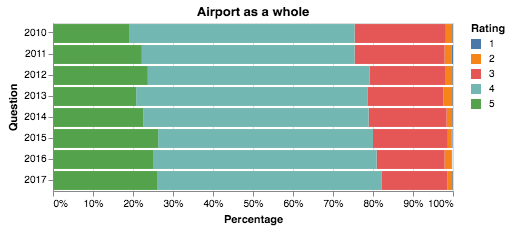

In [36]:
question='Airport as a whole'
question_code=questions_dict [question]

yaqu_f=pd.DataFrame(questions_data_dicts[question_code])
yaqu_f=yaqu_f.sort_index(axis='index', ascending=True)
yaqu_f.index.name = 'Rating'
print ('Question:',question,'\nData:\n',yaqu_f)

yaqu_f['Rating']=yaqu_f.index
yaqu_f_m=pd.melt(frame=yaqu_f,id_vars='Rating',value_name='f') #melt yaqu_f to prepare for stacked bar chart
yaqu_f_m.rename(columns = {'variable':'Question'}, inplace = True)
yaqu_f_m=yaqu_f_m[['Question','Rating','f']]

alt.Chart(yaqu_f_m).mark_bar().encode(
        x=alt.X('sum(f)',axis=alt.Axis(format='%', title='Percentage')),
        y=alt.Y('Question:O', axis=alt.Axis(title='Question')),
        color='Rating:N'    
        ).properties(
             title=str(question),
        )

Question: Airport parking facilities 
Data:
          2010   2011   2012   2013   2014   2015   2016   2017
Rating                                                        
1       0.021  0.010  0.014  0.010  0.023  0.010  0.006  0.015
2       0.061  0.054  0.058  0.052  0.055  0.070  0.049  0.046
3       0.275  0.308  0.277  0.284  0.273  0.258  0.260  0.274
4       0.430  0.399  0.408  0.433  0.405  0.376  0.400  0.383
5       0.212  0.228  0.243  0.221  0.243  0.286  0.284  0.282


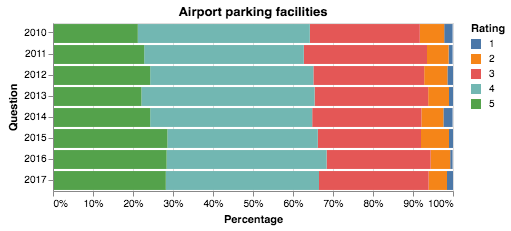

In [37]:
question='Airport parking facilities'
question_code=questions_dict [question]

yaqu_f=pd.DataFrame(questions_data_dicts[question_code])
yaqu_f=yaqu_f.sort_index(axis='index', ascending=True)
yaqu_f.index.name = 'Rating'
print ('Question:',question,'\nData:\n',yaqu_f)

yaqu_f['Rating']=yaqu_f.index
yaqu_f_m=pd.melt(frame=yaqu_f,id_vars='Rating',value_name='f') #melt yaqu_f to prepare for stacked bar chart
yaqu_f_m.rename(columns = {'variable':'Question'}, inplace = True)
yaqu_f_m=yaqu_f_m[['Question','Rating','f']]

alt.Chart(yaqu_f_m).mark_bar().encode(
        x=alt.X('sum(f)',axis=alt.Axis(format='%', title='Percentage')),
        y=alt.Y('Question:O', axis=alt.Axis(title='Question')),
        color='Rating:N'    
        ).properties(
             title=str(question),
        )

Question: Retail shops & concessions 
Data:
          2010   2011   2012   2013   2014   2015   2016   2017
Rating                                                        
1       0.009  0.014  0.009  0.009  0.011  0.005  0.012  0.012
2       0.081  0.077  0.068  0.075  0.074  0.063  0.079  0.065
3       0.440  0.386  0.367  0.392  0.370  0.372  0.342  0.363
4       0.356  0.380  0.407  0.382  0.398  0.379  0.380  0.390
5       0.114  0.144  0.149  0.142  0.147  0.182  0.187  0.170


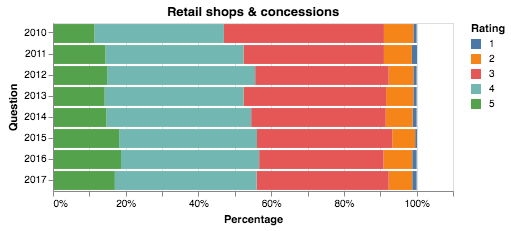

In [38]:
question='Retail shops & concessions'
question_code=questions_dict [question]

yaqu_f=pd.DataFrame(questions_data_dicts[question_code])
yaqu_f=yaqu_f.sort_index(axis='index', ascending=True)
yaqu_f.index.name = 'Rating'
print ('Question:',question,'\nData:\n',yaqu_f)

yaqu_f['Rating']=yaqu_f.index
yaqu_f_m=pd.melt(frame=yaqu_f,id_vars='Rating',value_name='f') #melt yaqu_f to prepare for stacked bar chart
yaqu_f_m.rename(columns = {'variable':'Question'}, inplace = True)
yaqu_f_m=yaqu_f_m[['Question','Rating','f']]

alt.Chart(yaqu_f_m).mark_bar().encode(
        x=alt.X('sum(f)',axis=alt.Axis(format='%', title='Percentage')),
        y=alt.Y('Question:O', axis=alt.Axis(title='Question')),
        color='Rating:N'    
        ).properties(
             title=str(question),
        )

Question: Restaurants 
Data:
          2010   2011   2012   2013   2014   2015   2016   2017
Rating                                                        
1       0.012  0.014  0.012  0.010  0.013  0.009  0.021  0.016
2       0.087  0.081  0.068  0.085  0.085  0.078  0.087  0.090
3       0.414  0.364  0.347  0.371  0.357  0.328  0.322  0.337
4       0.380  0.394  0.409  0.389  0.399  0.393  0.380  0.378
5       0.107  0.147  0.165  0.144  0.146  0.192  0.190  0.179


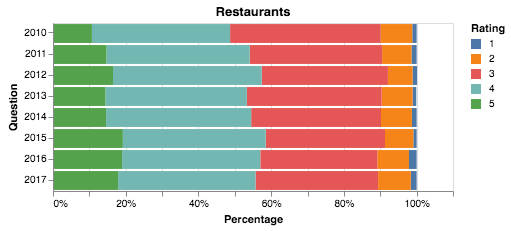

In [39]:
question='Restaurants'
question_code=questions_dict [question]

yaqu_f=pd.DataFrame(questions_data_dicts[question_code])
yaqu_f=yaqu_f.sort_index(axis='index', ascending=True)
yaqu_f.index.name = 'Rating'
print ('Question:',question,'\nData:\n',yaqu_f)

yaqu_f['Rating']=yaqu_f.index
yaqu_f_m=pd.melt(frame=yaqu_f,id_vars='Rating',value_name='f') #melt yaqu_f to prepare for stacked bar chart
yaqu_f_m.rename(columns = {'variable':'Question'}, inplace = True)
yaqu_f_m=yaqu_f_m[['Question','Rating','f']]

alt.Chart(yaqu_f_m).mark_bar().encode(
        x=alt.X('sum(f)',axis=alt.Axis(format='%', title='Percentage')),
        y=alt.Y('Question:O', axis=alt.Axis(title='Question')),
        color='Rating:N'    
        ).properties(
             title=str(question),
        )

Question: Accessing & using free WiFi 
Data:
          2013   2014   2015   2016   2017
Rating                                   
1       0.084  0.052  0.036  0.031  0.023
2       0.091  0.064  0.052  0.055  0.049
3       0.198  0.180  0.182  0.165  0.182
4       0.343  0.327  0.306  0.317  0.316
5       0.285  0.376  0.424  0.431  0.430


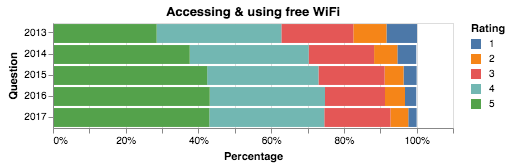

In [40]:
question='Accessing & using free WiFi'
question_code=questions_dict [question]

yaqu_f=pd.DataFrame(questions_data_dicts[question_code])
yaqu_f=yaqu_f.sort_index(axis='index', ascending=True)
yaqu_f.index.name = 'Rating'
print ('Question:',question,'\nData:\n',yaqu_f)

yaqu_f['Rating']=yaqu_f.index
yaqu_f_m=pd.melt(frame=yaqu_f,id_vars='Rating',value_name='f') #melt yaqu_f to prepare for stacked bar chart
yaqu_f_m.rename(columns = {'variable':'Question'}, inplace = True)
yaqu_f_m=yaqu_f_m[['Question','Rating','f']]

alt.Chart(yaqu_f_m).mark_bar().encode(
        x=alt.X('sum(f)',axis=alt.Axis(format='%', title='Percentage')),
        y=alt.Y('Question:O', axis=alt.Axis(title='Question')),
        color='Rating:N'    
        ).properties(
             title=str(question),
        )

In [30]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')